# 2020.12.09

- Twitter Sentiment Analysis.ppt
- Simple LSTM with Dropout and Low Dimensionality

## 실습 - LSTM Layer Stacking

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import math
%matplotlib inline

In [5]:
df = pd.read_csv("Tweets.csv", sep=',')

df['airline_sentiment'].value_counts()

df['airline_sentiment'] = df['airline_sentiment'].replace('neutral', 1)
df['airline_sentiment'] = df['airline_sentiment'].replace('negative', 0)
df['airline_sentiment'] = df['airline_sentiment'].replace('positive', 2)

x = df['text']
y = df['airline_sentiment']

# print(x.head(3))
# print(y.head(3))

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence

def max_tweet(sequences):
    for i in range(1, len(sequences)):
        max_length = len(sequences[0])
        if len(sequences[i]) > max_length:
            max_length = len(sequences[i])
    return max_length

t = Tokenizer()
t.fit_on_texts(x)

vocab_size = len(t.word_index) + 1
sequences = t.texts_to_sequences(x)

tweet_num = max_tweet(sequences)
tweet_num

30

In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen = tweet_num
padded_x = pad_sequences(sequences, padding='post', maxlen=maxlen)

labels = to_categorical(np.asarray(y))
#labels

In [11]:
x_train, x_test, y_train, y_test = train_test_split(padded_x, labels, test_size=0.2, random_state=10)
print('x_train :', x_train.shape)
print('y_train :', y_train.shape)
print('x_test :', x_test.shape)
print('y_test :', y_test.shape)

x_train : (11712, 30)
y_train : (11712, 3)
x_test : (2928, 30)
y_test : (2928, 3)


In [12]:
embeddings_index = dict()
f = open('glove.6B.100d.txt',encoding='UTF-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [13]:
embedding_matrix = np.zeros((vocab_size, 100))

for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

from tensorflow.keras.layers import Embedding
embedding_layer = Embedding(input_dim=vocab_size, output_dim=100, weights=[embedding_matrix],
                           input_length = tweet_num, trainable=False)

Epoch 1/30
37/37 [==============================] - 12s 334ms/step - loss: 0.8282 - acc: 0.6445 - val_loss: 0.7146 - val_acc: 0.7204
Epoch 2/30
37/37 [==============================] - 16s 426ms/step - loss: 0.6902 - acc: 0.7227 - val_loss: 0.6268 - val_acc: 0.7443
Epoch 3/30
37/37 [==============================] - 19s 511ms/step - loss: 0.6469 - acc: 0.7386 - val_loss: 0.6158 - val_acc: 0.7503
Epoch 4/30
37/37 [==============================] - 19s 521ms/step - loss: 0.6126 - acc: 0.7543 - val_loss: 0.5749 - val_acc: 0.7674
Epoch 5/30
37/37 [==============================] - 19s 525ms/step - loss: 0.6018 - acc: 0.7595 - val_loss: 0.5855 - val_acc: 0.7589
Epoch 6/30
37/37 [==============================] - 20s 529ms/step - loss: 0.5669 - acc: 0.7716 - val_loss: 0.5690 - val_acc: 0.7759
Epoch 7/30
37/37 [==============================] - 20s 535ms/step - loss: 0.5634 - acc: 0.7745 - val_loss: 0.5587 - val_acc: 0.7764
Epoch 8/30
37/37 [==============================] - 20s 536ms/step - 

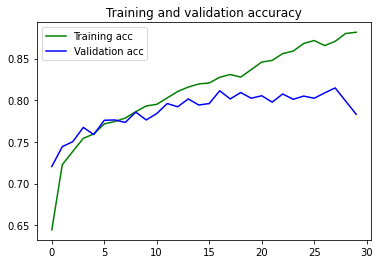

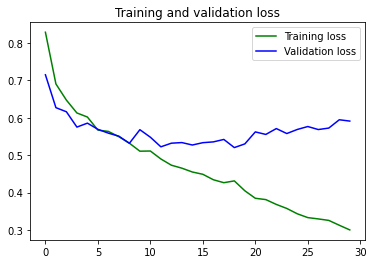

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import BatchNormalization

# LSTM Model
model_3 = Sequential()
model_3.add(embedding_layer)
model_3.add(LSTM(256, dropout = 0.2, recurrent_dropout = 0.5, return_sequences = True))
model_3.add(LSTM(128, dropout = 0.2, recurrent_dropout = 0.5))
model_3.add(Dense(3, activation='softmax'))
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

history_3 = model_3.fit(x_train, y_train, validation_split = 0.2, epochs=30, batch_size=256)

loss, accuracy = model_3.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model_3.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

acc = history_3.history['acc']
val_acc = history_3.history['val_acc']
loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 임베딩.ppt